## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is meant for predictions of contiunous variables given a independent variable. There are many types of regression models. For example, when there is one independent variable it is a simple linear regression, and when there are more than one it is a multiple regression.  A linear regression shows the relationship between the independent and continous dependent variables as a fitted straight line by minimizing the sum of squared errors. A multiple regression determines whichvariable has the most significant influence on the dependent variable to make it's prediction. Regression can be used for predictnig future rates, prices, or quantities based on past data. 

    Classification is meant for predictions of categorical variables given a independent variable. Classification are made amoung the data points based on the probability of a data point's label. There can be two classes (binary classification) or more than two (multi-class classification). Unlike regression which predicts future values, classification is more used for predicting what fixed label to give a data point. <br>

2. Confusion Matrices (crosstab in pandas) are used to understand the performance of classification models. It determines how accurate the model is at predicting by comparing it with the actual result. It breaks it does to percentages of predictions being a true positive, true negative, false positive, false negative. <br>

3. Accuracy is the rate of predictions that are the same as the actual result. In the confusion matrix, accuracy is determined by the percentage of predictions that are true negatives and true positives. <br>

4. The root mean square error finds the square root of the average squared difference between the predicted value and actual value from a regression model. This method of understanding accuracy is effective in weighting larger errors more heavily. <br>


5. Overfitting is when a model incorporates information that is too specific to the training data, and thus does not perform well when used to predict new data. This is because the model is too complex for the data. In classification models, this occurs when the number of clusters (k) picked is too low. 


    Underfitting is when a model is too simple and therfore does not uncapsulate the patterns of the data to make an accurate prediction. This can be due to necessary columns not being incorporated. It can also occur in classificaiton models when the number of clusters (k) picked is too high. <br>

    Overall, we want to not overfit or underfit  our model so that we can produce more accurate preditctions.

6. A training data set is used in a model during the learning stage to analyze and interpret the data's patterns in order to minimize error of it's predictions and actual value of the data. A testing data set is used  in a model during the final evaluation stage to compare and determine the accuracy of the model's predictions with the actual value. <br>

    The training set is alway separated from the testing set becasue when the model is training, it is learning and adapting based solely on the data. This means that the model could potential be too specfic for the data it's learning from or the model could be learning noise/irrelevant patterns and thus be overfit and perform poorly with new data. If it was not separated, we would not be able to determine if the model has been overfit. Splitting data into training and testing sets allows us to evaluate the model's performance and see it's accuracy. <br>

    Choosing a k in a classification model is also very important when maximizing model performance because the number of neighbors considered by the model effect the accuracy of the model's predictions. With a k that is too low, the model is very sensitive to outliers/noise and thus the data points may be captured in a classification of outlier/noise-effected data points. With a k that is too high, the model is considering data points that have a less strong correlation and therefore can mislabel the data point. 


7. Predicting with a hard classification (ie. y_hat = fitted_model.predict(x_hat)) means that our prediction is the name of the classification assigned for each case we are predicting. This method is very easy to interpret and useful when wanting to simply determine a label for the case. It also  does not require computing probabilities of these categories like soft classification with probability distribution. A weakness of this method is that it does not calcuate the uncertainty and therefore can not really be adjusted in terms of probability threshold. 

    Predicting with a soft classification/probability distribution (i.e. y_hat = fitted_model.predict_proba(x_hat)) means that our prediction shows the confidence within each class aka the probability distribution. It is useful when wanting to understand the breakdown of the prediction decision based on the probability of each class classification. It can also be adapted with thresholds for the number of incorrect/correct predictions permitted. A weakness of this method is that it can be hard to interpret, and sometimes the models produce probabilities that are not very realistic and therefore may require additional processing. 


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [ ]:
#Q2.1

import pandas as pd

df = pd.read_csv('../undergrad_ml/data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [ ]:
#Q2.1 continued

print(f'Soil types: {df["soil"].unique()}') #there are 6 soil types in the dataset
print(f'Mine types: {df["mine_type"].unique()}') #and there are 5 mine types

Soil types: [0.  0.6 0.2 0.8 0.4 1. ]
Mine types: [1 2 3 4 5]


In [ ]:
#Q2.1 continued

df.nunique()

voltage      196
height        12
soil           6
mine_type      5
dtype: int64

In [ ]:
#Q2.1 continued

df.isna().sum() #yay no na values!

voltage      0
height       0
soil         0
mine_type    0
dtype: int64

In [ ]:
#Q2.1 continued

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


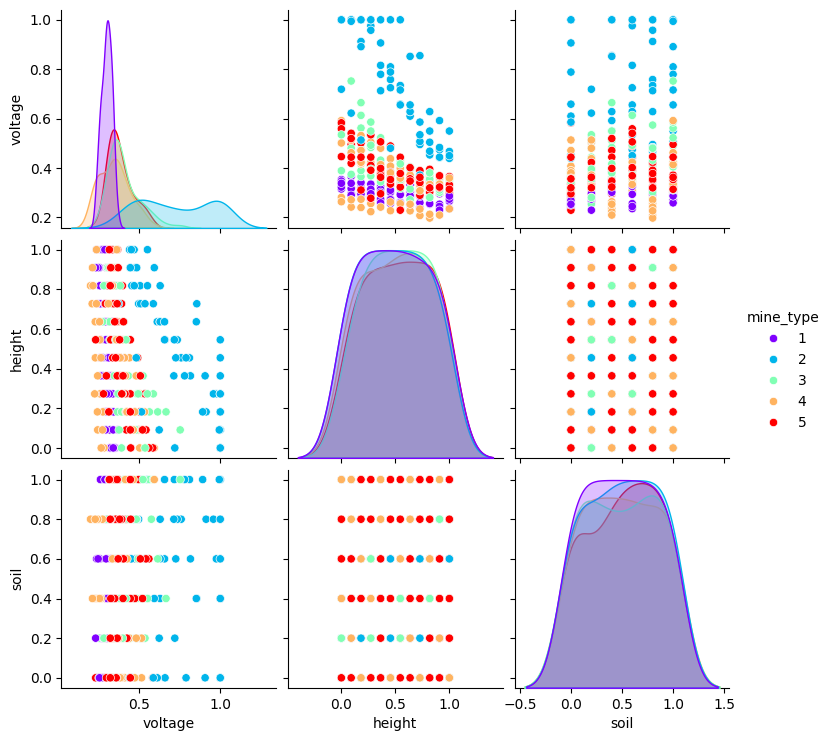

In [72]:
#Q2.1 continued

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='mine_type', palette='rainbow')


In [ ]:
#Q2.1 continued

df['soil'] = df['soil'].astype('str')


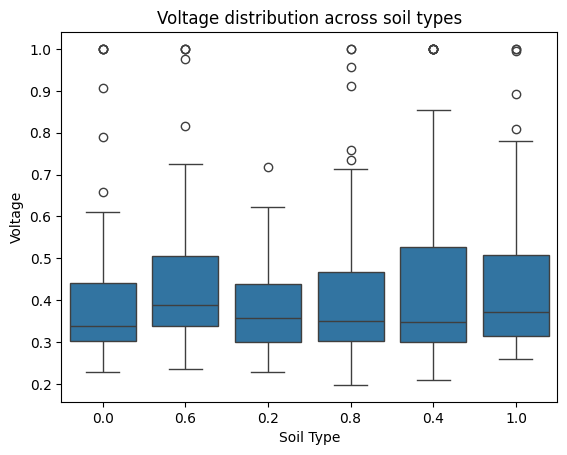

In [ ]:
#Q2.1 continued

sns.boxplot(data=df, x='soil', y='voltage')

plt.title('Voltage distribution across soil types')
plt.xlabel('Soil Type')
plt.ylabel('Voltage')
plt.show()

In [ ]:
#Q2.1 continued

#the pairplot show that mine_type 2 is fairly distint from the other types when looking at voltage with soil and voltage with height
#It is apparent, through the aligned data points, that soil acts more as a categorial variable than a continuous one. I thus wanted
#to visualize soil as a category with a boxplot, which shows the variations in voltage across the different soil types.


In [77]:
#Q2.2

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

def minmax(x) :
    u = (x-min(x))/(max(x)-min(x))
    return u    

y = df['mine_type']
ctrl_list = [ 'voltage', 'soil', 'height' ]
x = df.loc[:, ctrl_list]
u = MinMaxScaler().fit_transform(x)

u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.2, random_state=42)


5


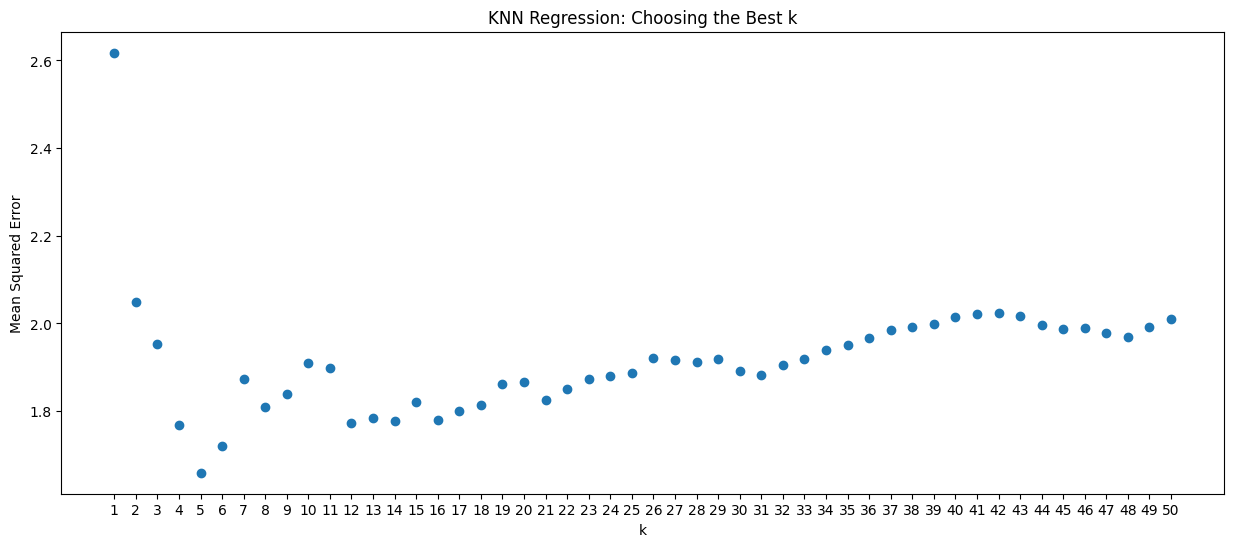

In [ ]:
#Q2.3 


from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


ks = range(1, 51, 1)
mse = []

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)
    pred = model.predict(u_test)
    mse.append(mean_squared_error(y_test, pred))


best_k = ks[mse.index(min(mse))]

print(best_k)

plt.figure(figsize=(15, 6))
plt.scatter(ks, mse)
plt.xticks(list(ks)) # as shown in the graph and by best_k, the error is lowest at k=5 and therefore our k will be 5
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: Choosing the Best k')
plt.show()


In [ ]:
#Q2.3 continued

# I chose k=5 because it had the lowest mean squared error of all the k values. The MSE is the average sqaure rooted error 
# between the predicted and actual value output. We want the lowest error to show that our model is performing well on the 
# test data. The graph above shows that the MSE is lowest at k = 5, and that it generally increases as k increases past 5
 

In [84]:
#Q2.4

from sklearn.metrics import confusion_matrix, classification_report


model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(u_train, y_train)
y_hat = model.predict(u_test)

print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_hat)}")
print(f"Classification Report: \n {classification_report(y_test, y_hat)}")

Confusion Matrix: 
 [[ 9  0  2  0  0]
 [ 0 11  0  1  0]
 [ 5  1  5  3  2]
 [ 2  1  4  2  2]
 [ 5  0  9  4  0]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.43      0.82      0.56        11
           2       0.85      0.92      0.88        12
           3       0.25      0.31      0.28        16
           4       0.20      0.18      0.19        11
           5       0.00      0.00      0.00        18

    accuracy                           0.40        68
   macro avg       0.34      0.45      0.38        68
weighted avg       0.31      0.40      0.34        68



In [85]:
#2.4 continued

#As shown in the classificaion report, the accuracy of the model is 0.40 which is not very high. From the precision and recall values,
#we can see that the model is good at predicition class 1 with 0.43 precision (meaning fewer false positives) and 0.82 recall (correct 
#classificaion), class 2 with 0.85 precision and 0.92 recall. The rest of the classes have very low precision and recall, meaning that 
#the model is not as good at predicting those classes. This may be because there are fewer data points for those classes, or because
#the columns are not great indicators of those classes. 


In [ ]:
#Q2.5

#I would suggest that a person would use this model to predict class 1 and class 2 which correlates with mine_type 1 and 2 respectively. 
#The rest of the classes/mine_types are not accuracte enough to be used for predictions. Someone could add a threshold to the model so that
#it if the top probability of a class is below a certain number, then the model would give a warning that that user should manually check
#the data point. 

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [11]:
#Q3.1

df = pd.read_csv('../undergrad_ml/data/USA_cars_datasets.csv')

df = df[["price", "year", "mileage"]]

print(df.head())
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows.")
print(f"The missing values of each column are: \n{df.isna().sum()}")

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
There are 3 columns and 2499 rows.
The missing values of each column are: 
price      0
year       0
mileage    0
dtype: int64


In [12]:
#Q3.2

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u    

x = df[["mileage", "year"]].apply(minmax)
y = df['price']

In [13]:
#Q3.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

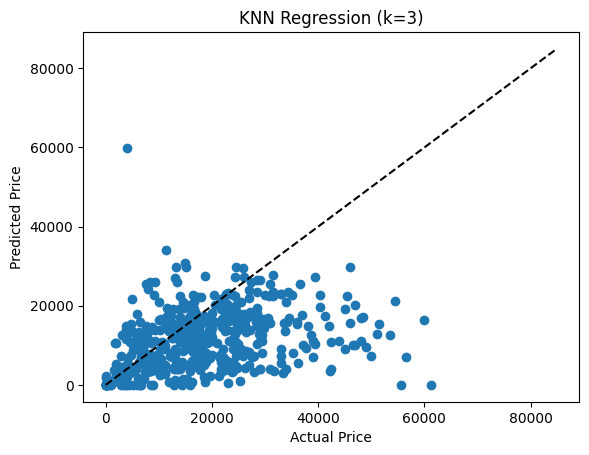

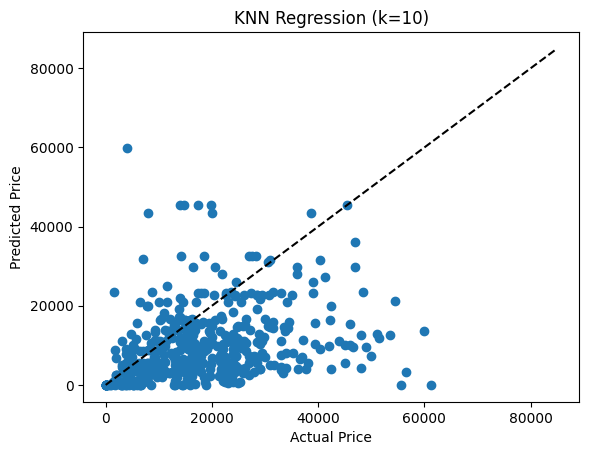

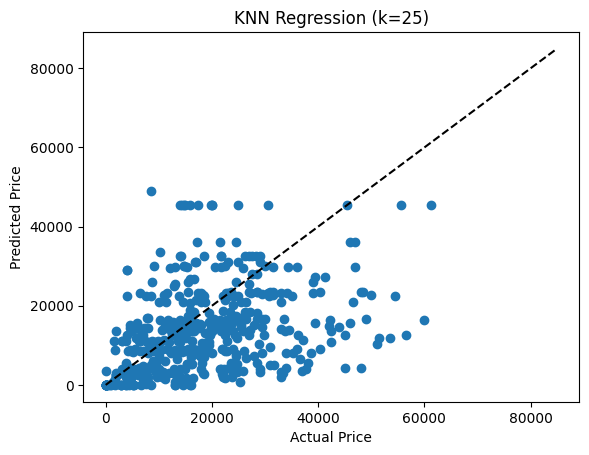

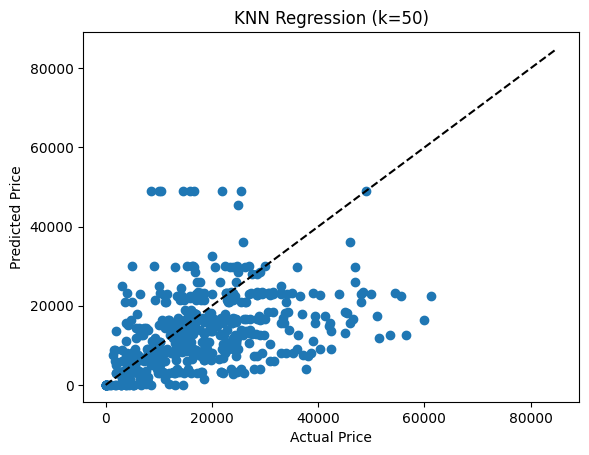

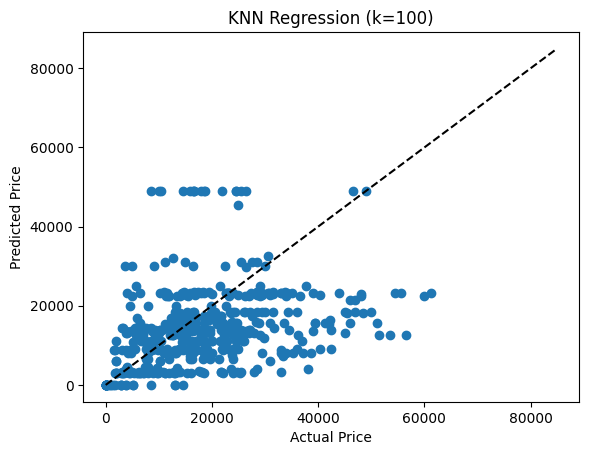

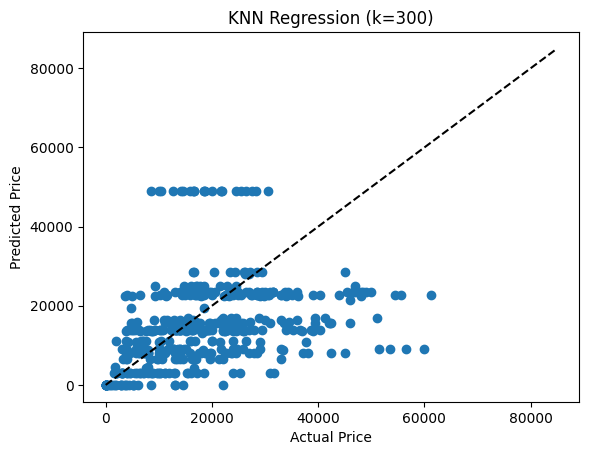

In [14]:
#Q3.4
from sklearn.neighbors import KNeighborsClassifier

k_list = [3, 10, 25, 50, 100, 300]

mse_list = []


for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    plt.scatter(y_test, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'KNN Regression (k={k})')
    plt.show()

In [ ]:
#Q3.4 continued

#As k increases, the points shift from closely clustered around the line of best fit to a more wide dispersion.
#The graphs as k increases show that there are more and more potential outliers that are not being predicted well.
# I also notice that horizontal line patterns appear and grow more alignedin the data points as k increases. 

In [16]:
#Q3.5
import numpy as np
best_k = k_list[int(np.argmin(mse_list))]

best_k


50

In [ ]:
#Q3.6

#Smaller k's are more variable because it is more sensitive to variation of the surrounding data.
# Smaller k's can result in overfitting. I notice that as the k value increases, the predicted 
# values become more smooth and horizontally aligned, which shows that the model is predicting the 
# same price for many different actual prices (less sensitive). This may be because as the model is
# averaging the price of the neighbors, it is becoming less sensitive to their values. It therefore
# begins to predict a more general price for a wider range of actual prices. It is important to choose
# a k value that is not too small/overfitted/variable, and not too large/underfitted/not sensitive/smooth
# graph with horizontal lines. 

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [35]:
#Q6.1

df = pd.read_csv("../undergrad_ml/data/airbnb_hw.csv")

df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [36]:
#Q6.1 continued
df = df.loc[:, ['Beds', 'Price', 'Review Scores Rating']] 
list(np.unique(df['Price'])) #there are commas in the price column
df['Price'] = df['Price'].str.replace(',', '').astype(float) #works, therefore no need to clean further (ie no $)

In [37]:
#Q6.2

df_null = df[df['Review Scores Rating'].isnull()].dropna(subset=['Beds', 'Price'])
df_null

,Beds,Price,Review Scores Rating
0,1.0,145.0,NaN
1,1.0,37.0,NaN
2,1.0,28.0,NaN
3,3.0,199.0,NaN
13,1.0,68.0,NaN
...,...,...,...
30473,5.0,300.0,NaN
30474,2.0,125.0,NaN
30475,1.0,80.0,NaN
30476,1.0,35.0,NaN


In [51]:
#Q6.3

df_complete = df.dropna(axis=0, how='any')

df_complete

,Beds,Price,Review Scores Rating
4,3.0,549.0,96.0
5,1.0,149.0,100.0
6,1.0,250.0,100.0
7,1.0,90.0,94.0
8,2.0,270.0,90.0
...,...,...,...
30332,1.0,90.0,100.0
30347,1.0,65.0,80.0
30378,1.0,55.0,100.0
30404,1.0,60.0,100.0


In [45]:
#Q6.4

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

x_train_complete = df_complete[['Beds', 'Price']].apply(minmax)
y_train_complete = df_complete['Review Scores Rating']

In [46]:
#Q6.4 continued
x_train_complete, x_test_complete, y_train_complete, y_test_complete = train_test_split(x_train_complete, y_train_complete, test_size=0.2, random_state=100)

In [47]:
#Q6.4 continued

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_range_complete = list(range(1, 51, 1))

sse_list_complete = []

for k in k_range_complete:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train_complete , y_train_complete)

    y_pred_complete = model.predict(x_test_complete)

    sse = np.sum((y_test_complete - y_pred_complete)**2)
    sse_list_complete.append(sse)

best_k = k_range_complete[int(np.argmin(sse_list_complete))]
best_k #best_k = 48


48

In [88]:
#Q6.4 continued

# I chose k=48 because it had the lowest mean squared error of all the k values. The SSE is the sum of the squared errors 
# between the predicted and actual value output. We want the lowest error to show that our model is performing well on the 
# test data. The graph above shows that the SSE is lowest at k = 48, and that it generally increases as k increases past 48
 

In [48]:
#Q6.5

x_train_complete = df_complete[['Beds', 'Price']].apply(minmax)
y_train_complete = df_complete['Review Scores Rating']

x_test_null = df_null[['Beds', 'Price']].apply(minmax)

In [49]:
#Q6.5 continued

model = KNeighborsRegressor(n_neighbors = best_k) #best_k = 48 from the prediction of completed data
model.fit(x_train_complete, y_train_complete)

y_pred_null = model.predict(x_test_null)

y_pred_null

array([90.66666667, 91.625     , 86.95833333, ..., 93.83333333,
       89.5       , 93.83333333])

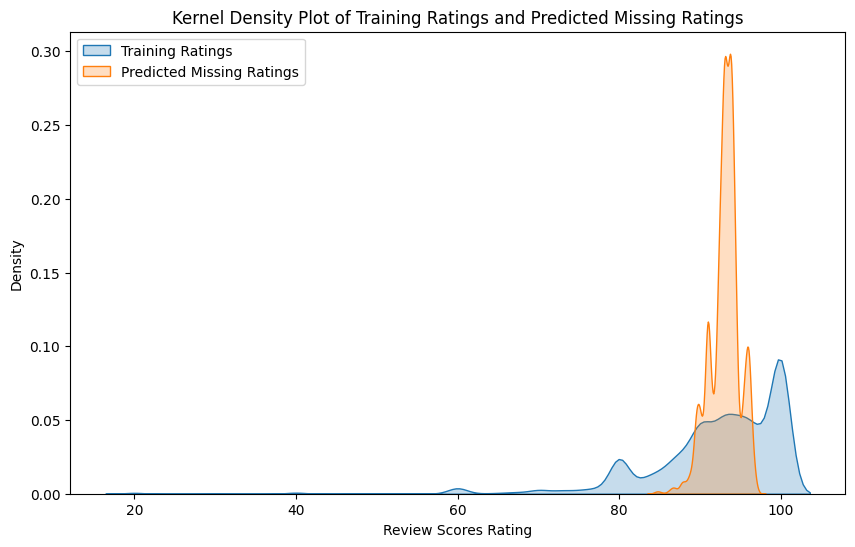

In [ ]:
#Q6.6

#6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(y_train_complete, fill=True)
sns.kdeplot(y_pred_null, fill=True)

plt.title('Kernel Density Plot of Training Ratings and Predicted Missing Ratings')
plt.legend(['Training Ratings', 'Predicted Missing Ratings'])
plt.show()




In [ ]:
#Q6.6

#The KDE plot shows that the distribution of the training rating is much more spread out than the predicted 
#missing ratings. This shows that the predicted missing rating is much more concentrated around a particular
#range (i.e. ~85 to ~97). This is a little concerning that the distributions are not very similar, as it 
#could indicate that the model is over predicting a certain range (biased), and is not representing the rest
#of the distribution of the training ratings.  